# Analysis of the splitting strategy

In this notebook, we analyze the splitting strategy of the python course. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Tooling

In [53]:
def compare_two_strategies(csv_path1: str, csv_path2: str, plot_type: str) -> None:
    """
    Plot chunk statistics for two CSV files in subplots.

    Parameters
    ----------
    csv_path1 : str
        Path to the first CSV file containing chunk statistics.
    csv_path2 : str
        Path to the second CSV file containing chunk statistics.
    plot_type : str
        Type of plot ('tokens' or 'chars'). Determines whether to plot the number of tokens or characters.
    """
    _fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    
    # Plot the first CSV file
    df1 = pd.read_csv(csv_path1)
    # Check if the plot_type is valid
    if plot_type == 'tokens':
        i = 3
    elif plot_type == 'chars':
        i = 2
    else:
        raise ValueError("plot_type must be either 'tokens' or 'chars'")
    
    axs[0].plot(df1.iloc[:, 0], df1.iloc[:, i], marker='o', linestyle='-', color='b' if plot_type == 'tokens' else 'r')
    axs[0].set_xlabel('Chunk ID')
    axs[0].set_ylabel(f'Number of {plot_type.capitalize()}')
    axs[0].set_title(f'Number of {plot_type.capitalize()} per Chunk ID\n(File: {csv_path1.split("/")[-1]})')
    
    # Plot the second CSV file
    df2 = pd.read_csv(csv_path2)
    axs[1].plot(df2.iloc[:, 0], df2.iloc[:, i], marker='o', linestyle='-', color='b' if plot_type == 'tokens' else 'r')
    axs[1].set_xlabel('Chunk ID')
    axs[1].set_ylabel(f'Number of {plot_type.capitalize()}')
    axs[1].set_title(f'Number of {plot_type.capitalize()} per Chunk ID\n(File: {csv_path2.split("/")[-1]})')
    
    plt.tight_layout()
    plt.show()

## Analysis

In [57]:
# Load the CSV files
stats_by_headers_path = '../../chroma_db_by_headers_chunks_stats.csv'
stats_by_headers_and_chars_path = '../../chroma_db_chunks_stats.csv'

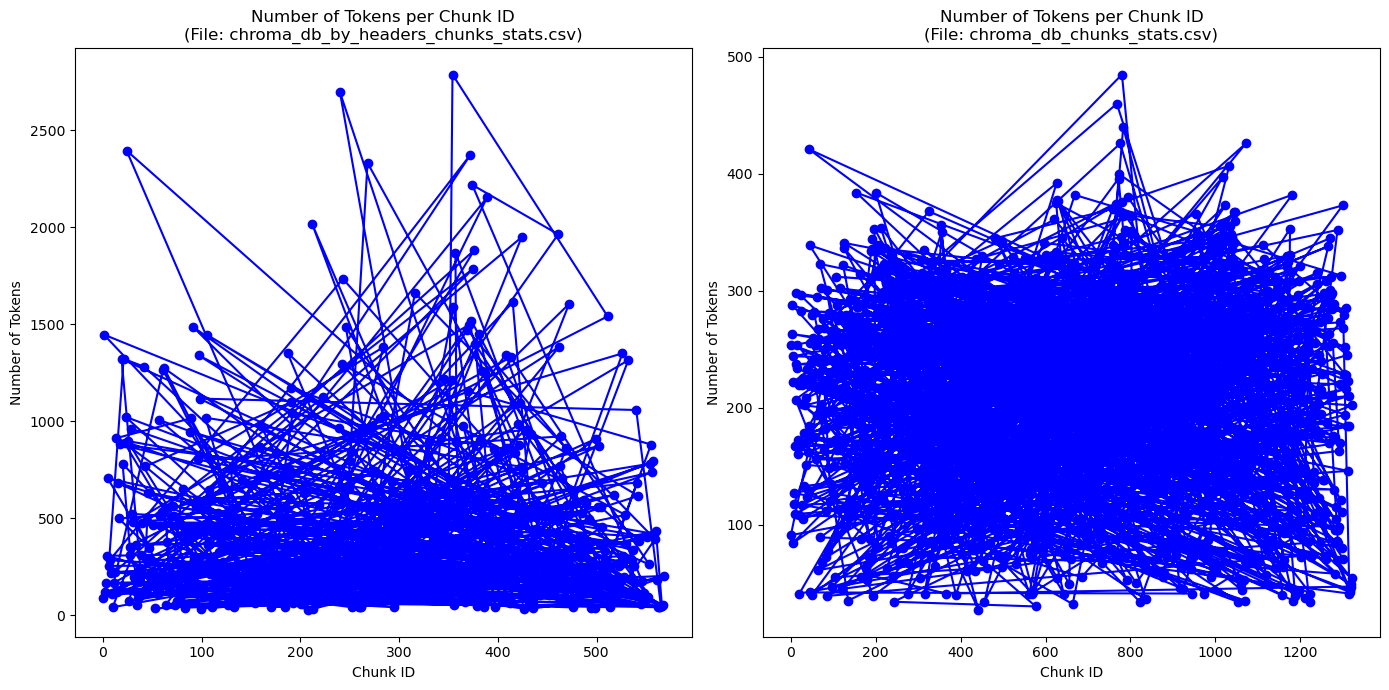

In [55]:
# Plot the number of tokens per chunk ID for each splitting strategy
compare_two_strategies(stats_by_headers_path, stats_by_headers_and_chars_path, 'tokens')

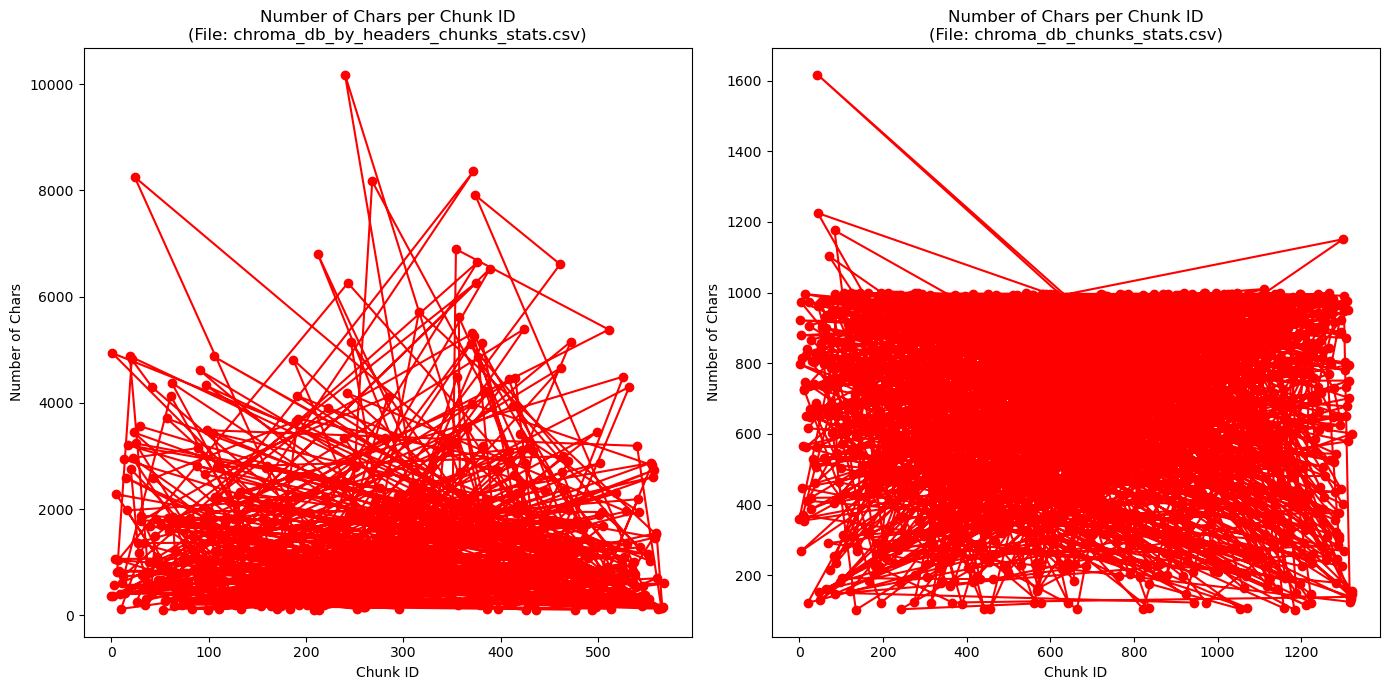

In [56]:
# Plot the number of characters per chunk ID for each splitting strategy
compare_two_strategies(stats_by_headers_path, stats_by_headers_and_chars_path, 'chars')